In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objects as go
from sklearn.tree import plot_tree
from plotly.subplots import make_subplots
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

## ----------------------------------------*Mostafa Farag: 200034359*--------------------------------------
## ----------------------------------------*Yousef mohammed ali: 200033377*--------------------------------
## ----------------------------------------*Yousef mohamed salama: 200033523*------------------------------
## ----------------------------------------*Adham Jehad El Oraby: 200029570*-------------------------------
## ----------------------------------------*shady wafik: 200026518*-----------------------------------------

In [53]:


image_path = r"Time-Series-Analysis.jpg"

display(HTML(f'<div style="text-align: center;margin-top:20px"><img src="{image_path}" style="max-width: 100%; height: auto;" /></div>'))


In [54]:
# pd.set_option('display.max_colwidth', None)
df=pd.read_csv('DataStcok.csv')
df

Unnamed: 0.1  Unnamed: 0 symbol                       date    close  \
0                0           0   AAPL  2015-05-27 00:00:00+00:00  132.045   
1                1           1   AAPL  2015-05-28 00:00:00+00:00  131.780   
2                2           2   AAPL  2015-05-29 00:00:00+00:00  130.280   
3                3           3   AAPL  2015-06-01 00:00:00+00:00  130.535   
4                4           4   AAPL  2015-06-02 00:00:00+00:00  129.960   
...            ...         ...    ...                        ...      ...   
1262          1262        1145   AAPL  2019-12-06 00:00:00+00:03  270.710   
1263          1263        1146   AAPL  2019-12-06 00:00:00+00:04  270.710   
1264          1264        1147   AAPL  2019-12-06 00:00:00+00:05  270.710   
1265          1265        1148   AAPL  2019-12-06 00:00:00+00:06  270.710   
1266          1266        1149   AAPL  2019-12-06 00:00:00+00:07  270.710   

         high     low    open    volume    adjClose  adjVolume  divCash  \
0     132.260  130.05  130.34  45833246  121.682558   45833246      0.0   
1     131.950  131.10  131.86  30733309  121.438354   30733309      0.0   
2     131.450  129.90  131.23  50884452  120.056069   50884452      0.0   
3     131.390  130.05  131.20  32112797  120.291057   32112797      0.0   
4     130.655  129.32  129.86  33667627  119.761181   33667627      0.0   
...       ...     ...     ...       ...         ...        ...      ...   
1262  271.000  267.30  267.48  26547493  269.348058   26547493      0.0   
1263  271.000  267.30  267.48  26547493  269.348058   26547493      0.0   
1264  271.000  267.30  267.48  26547493  269.348058   26547493      0.0   
1265  271.000  267.30  267.48  26547493  269.348058   26547493      0.0   
1266  271.000  267.30  267.48  26547493  269.348058   26547493      0.0   

      splitFactor  
0             1.0  
1             NaN  
2             1.0  
3             1.0  
4             NaN  
...           ...  
1262          1.0  
1263          1.0  
1264          1.0  
1265          1.0  
1266          1.0  

[1267 rows x 13 columns]

## Overview

**This dataset provides a comprehensive record of Apple Inc.'s stock price changes over the past 5 years => 1822 Day Business-Week. It includes essential columns such as the date, opening price, highest price of the day, lowest price of the day, closing price, adjusted closing price, and trading volume and adjHigh ,adjOpen,adjLow**

# EDA

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  1267 non-null   int64  
 1   Unnamed: 0    1267 non-null   int64  
 2   symbol        1150 non-null   object 
 3   date          1267 non-null   object 
 4   close         1267 non-null   float64
 5   high          1267 non-null   float64
 6   low           1267 non-null   float64
 7   open          1267 non-null   float64
 8   volume        1267 non-null   int64  
 9   adjClose      1267 non-null   float64
 10  adjVolume     1267 non-null   int64  
 11  divCash       1267 non-null   float64
 12  splitFactor   1246 non-null   float64
dtypes: float64(7), int64(4), object(2)
memory usage: 128.8+ KB


In [56]:

df.head()

Unnamed: 0.1  Unnamed: 0 symbol                       date    close  \
0             0           0   AAPL  2015-05-27 00:00:00+00:00  132.045   
1             1           1   AAPL  2015-05-28 00:00:00+00:00  131.780   
2             2           2   AAPL  2015-05-29 00:00:00+00:00  130.280   
3             3           3   AAPL  2015-06-01 00:00:00+00:00  130.535   
4             4           4   AAPL  2015-06-02 00:00:00+00:00  129.960   

      high     low    open    volume    adjClose  adjVolume  divCash  \
0  132.260  130.05  130.34  45833246  121.682558   45833246      0.0   
1  131.950  131.10  131.86  30733309  121.438354   30733309      0.0   
2  131.450  129.90  131.23  50884452  120.056069   50884452      0.0   
3  131.390  130.05  131.20  32112797  120.291057   32112797      0.0   
4  130.655  129.32  129.86  33667627  119.761181   33667627      0.0   

   splitFactor  
0          1.0  
1          NaN  
2          1.0  
3          1.0  
4          NaN

In [57]:
df.tail()

Unnamed: 0.1  Unnamed: 0 symbol                       date   close  \
1262          1262        1145   AAPL  2019-12-06 00:00:00+00:03  270.71   
1263          1263        1146   AAPL  2019-12-06 00:00:00+00:04  270.71   
1264          1264        1147   AAPL  2019-12-06 00:00:00+00:05  270.71   
1265          1265        1148   AAPL  2019-12-06 00:00:00+00:06  270.71   
1266          1266        1149   AAPL  2019-12-06 00:00:00+00:07  270.71   

       high    low    open    volume    adjClose  adjVolume  divCash  \
1262  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   
1263  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   
1264  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   
1265  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   
1266  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   

      splitFactor  
1262          1.0  
1263          1.0  
1264          1.0  
1265          1.0  
1266          1.0

In [58]:
df.sample(5)

Unnamed: 0.1  Unnamed: 0 symbol                       date   close  \
278            278         278   AAPL  2016-07-01 00:00:00+00:00   95.89   
1198          1198        1198   AAPL  2020-02-28 00:00:00+00:00  273.36   
793            793         793   AAPL  2018-07-19 00:00:00+00:00  191.88   
141            141         141   AAPL  2015-12-15 00:00:00+00:00  110.49   
344            344         344   AAPL  2016-10-05 00:00:00+00:00  113.05   

         high     low    open     volume    adjClose  adjVolume  divCash  \
278    96.465   95.33   95.49   26026540   90.173486   26026540      0.0   
1198  278.410  256.37  257.26  106721230  272.639128  106721230      0.0   
793   192.550  189.69  189.69   20286752  186.766725   20286752      0.0   
141   112.800  110.35  111.94   53323105  102.718837   53323105      0.0   
344   113.660  112.69  113.40   21453089  106.882858   21453089      0.0   

      splitFactor  
278           1.0  
1198          1.0  
793           1.0  
141           1.0  
344           1.0

In [59]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low',
       'open', 'volume', 'adjClose', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [60]:
df.shape

(1267, 13)

In [61]:
df.size

16471

In [62]:
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
symbol           object
date             object
close           float64
high            float64
low             float64
open            float64
volume            int64
adjClose        float64
adjVolume         int64
divCash         float64
splitFactor     float64
dtype: object

In [63]:
df.isna().sum()

Unnamed: 0.1      0
Unnamed: 0        0
symbol          117
date              0
close             0
high              0
low               0
open              0
volume            0
adjClose          0
adjVolume         0
divCash           0
splitFactor      21
dtype: int64

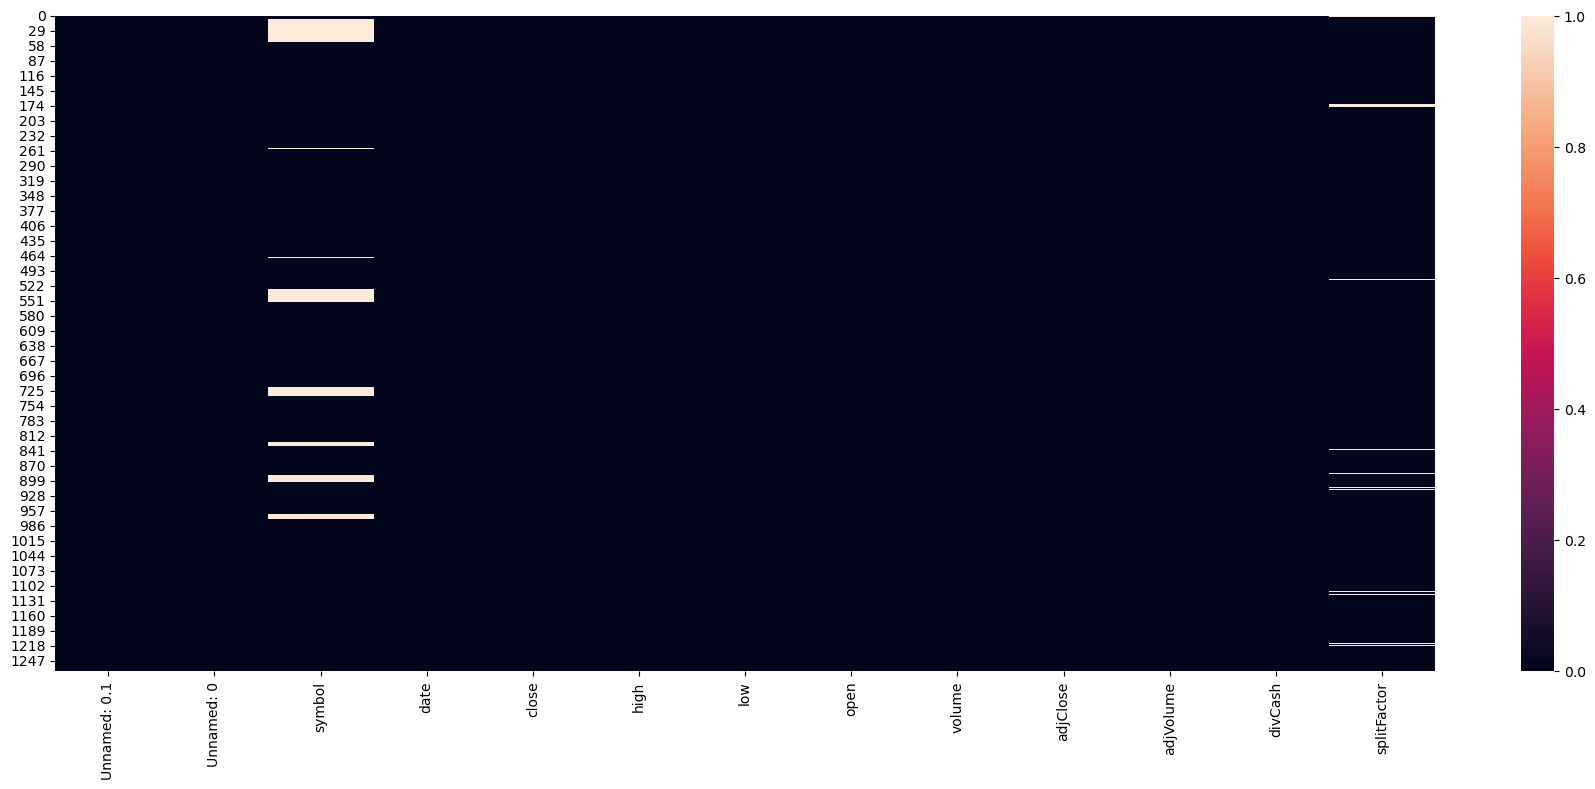

In [64]:
plt.figure(figsize=(18,8))
sns.heatmap(df.isna())
plt.tight_layout()

In [65]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1262    False
1263    False
1264    False
1265    False
1266    False
Length: 1267, dtype: bool

# PreProcessing
  - **cleaning & Outliers**
  - **Preparation & Transformation**
  

In [66]:
df.drop(columns=['Unnamed: 0','symbol'],inplace=True)

In [67]:
df.drop(columns=['Unnamed: 0.1'],inplace=True)

In [68]:
df.drop(columns=['divCash'],inplace=True)

In [69]:
df['splitFactor'].describe()

count    1246.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: splitFactor, dtype: float64

In [70]:
mean=df['splitFactor'].mean()
df['splitFactor'].fillna(mean,inplace=True)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_5904\1740944488.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [71]:
volume_count=df['adjVolume']==df['volume']
volume_count.value_counts()

True    1267
Name: count, dtype: int64

In [72]:
df.drop(columns=['adjVolume'],inplace=True)

In [73]:
df.sample(5)

date   close    high     low    open     volume  \
1050  2019-07-29 00:00:00+00:00  209.68  210.64  208.44  208.46   21673389   
246   2016-05-17 00:00:00+00:00   93.49   94.70   93.01   94.55   46916939   
974   2019-04-09 00:00:00+00:00  199.50  202.85  199.23  200.32   35768237   
983   2019-04-23 00:00:00+00:00  207.48  207.75  203.90  204.43   23322991   
1198  2020-02-28 00:00:00+00:00  273.36  278.41  256.37  257.26  106721230   

        adjClose  splitFactor  
1050  207.213880          1.0  
246    87.916562          1.0  
974   196.386708          1.0  
983   204.242176          1.0  
1198  272.639128          1.0

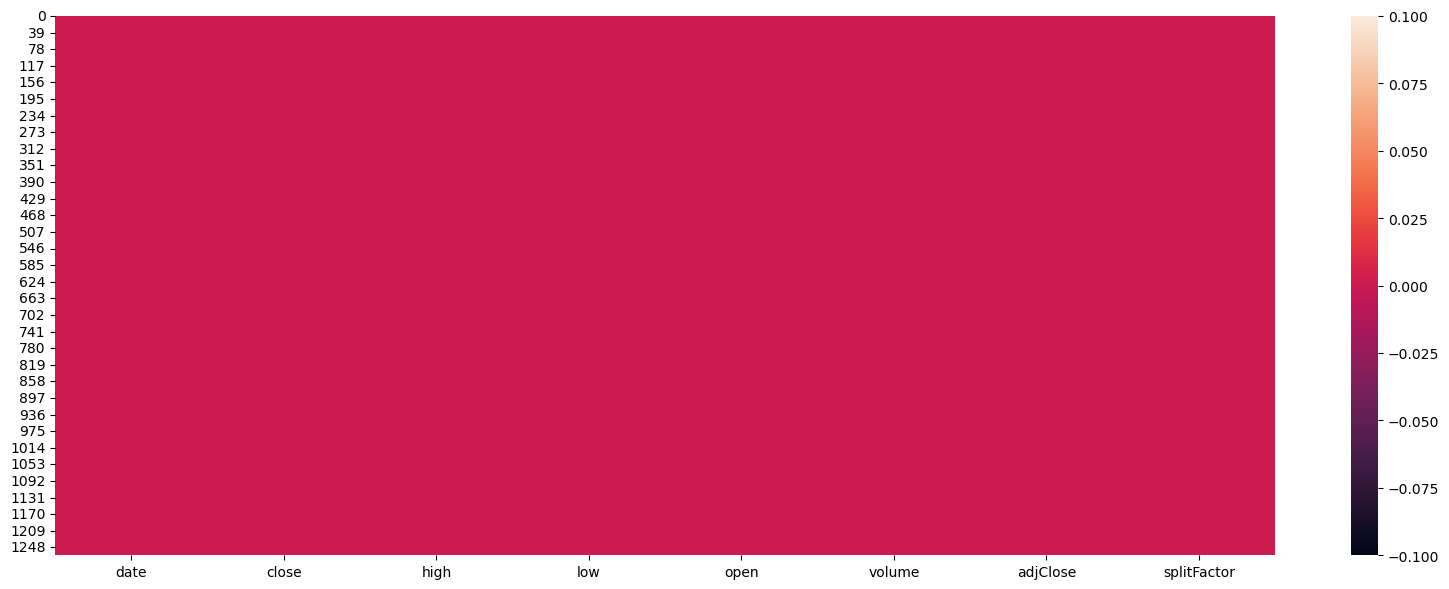

In [74]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isna())
plt.tight_layout()

In [75]:
df.drop_duplicates(inplace=True)

### **let's Check  Outliers**

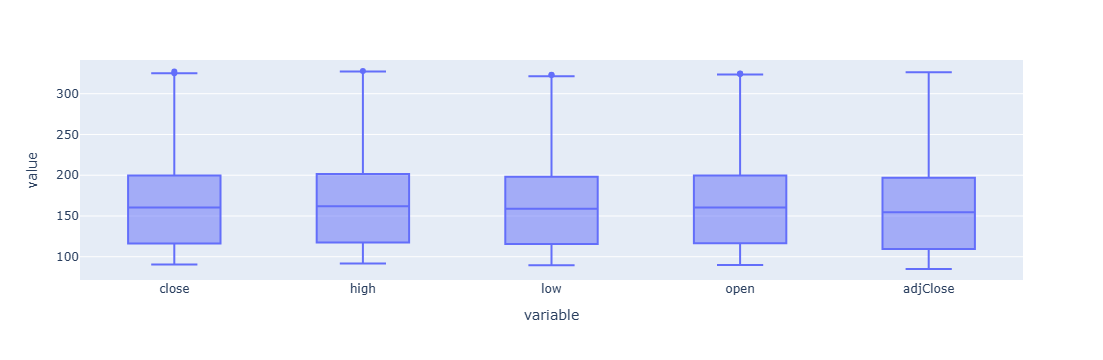

In [76]:
ex.box(df[['close','high','low','open','adjClose']])


## **Preparation & Transformation**

In [77]:
df.dtypes

date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
splitFactor    float64
dtype: object

In [78]:
df['date'] = pd.to_datetime(df['date'],utc=True)


In [79]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [80]:
df['date'].max()-df['date'].min()


Timedelta('1822 days 00:00:00')

In [81]:
df['date'].dt.microsecond.value_counts()

date
0    1258
Name: count, dtype: int64

In [82]:
df['date'].dt.second.value_counts()

date
0    1258
Name: count, dtype: int64

In [83]:
df['date'].dt.nanosecond.value_counts()

date
0    1258
Name: count, dtype: int64

In [84]:
df['date'].dt.minute.value_counts()


date
0     1251
59       1
58       1
57       1
56       1
55       1
54       1
53       1
Name: count, dtype: int64

In [85]:
df['date'].dt.hour.value_counts()


date
0     1251
23       7
Name: count, dtype: int64

In [86]:
df.insert(1,'Year',df['date'].dt.year)

In [87]:
df.insert(2,'Year_Quarter', df['date'].dt.year.astype(str) + '-Q' + df['date'].dt.quarter.astype(str))

In [88]:
df.insert(3,'Day-name',df['date'].dt.day.astype(str) + '-' + df['date'].dt.day_name())


In [89]:
df.insert(10,'Price-Adjustment',df['close']-df['adjClose'])

In [90]:
df.set_index('date',inplace=True)

In [91]:
describe_values=df.describe()

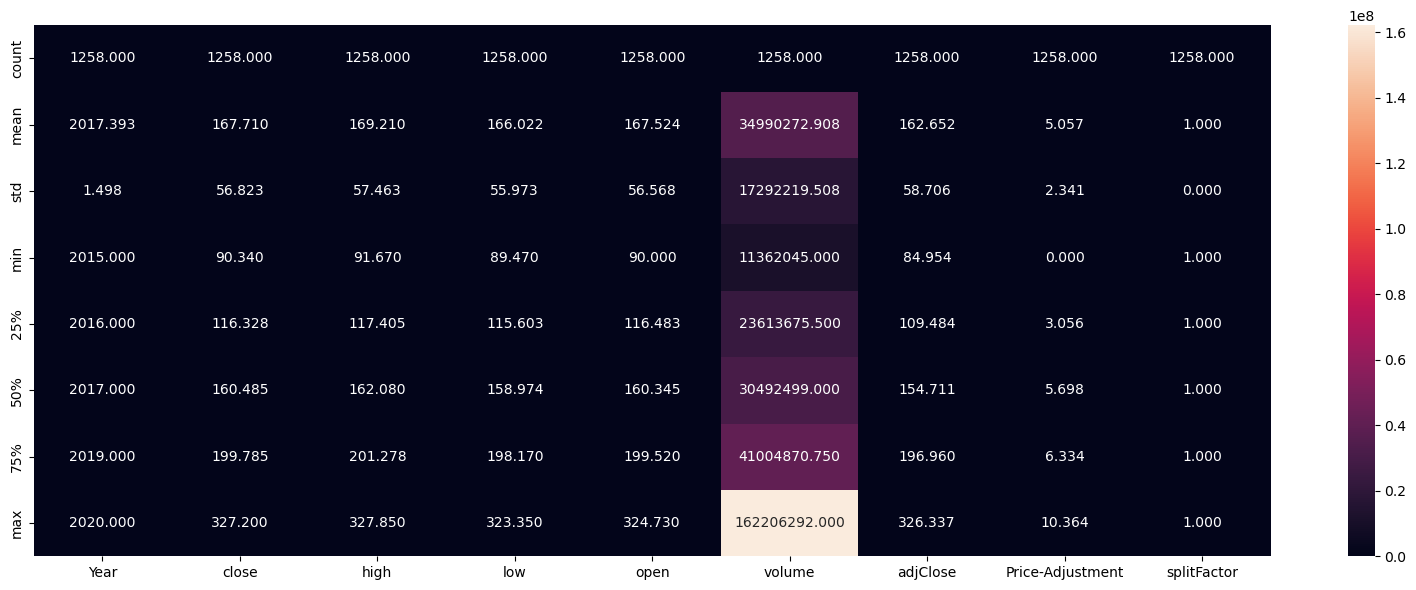

In [92]:
plt.figure(figsize=(16,6))
sns.heatmap(describe_values,fmt='0.3f',annot=True)
plt.tight_layout()

# - **Advanced EDA**

## Let's Advanced EDA => -------------------------Time Series Analysis-----------------------------------

In [93]:
piv=pd.pivot_table(df,index=['Year_Quarter'],values=['close','adjClose','Price-Adjustment','high','low','open'],aggfunc='mean').round(3)


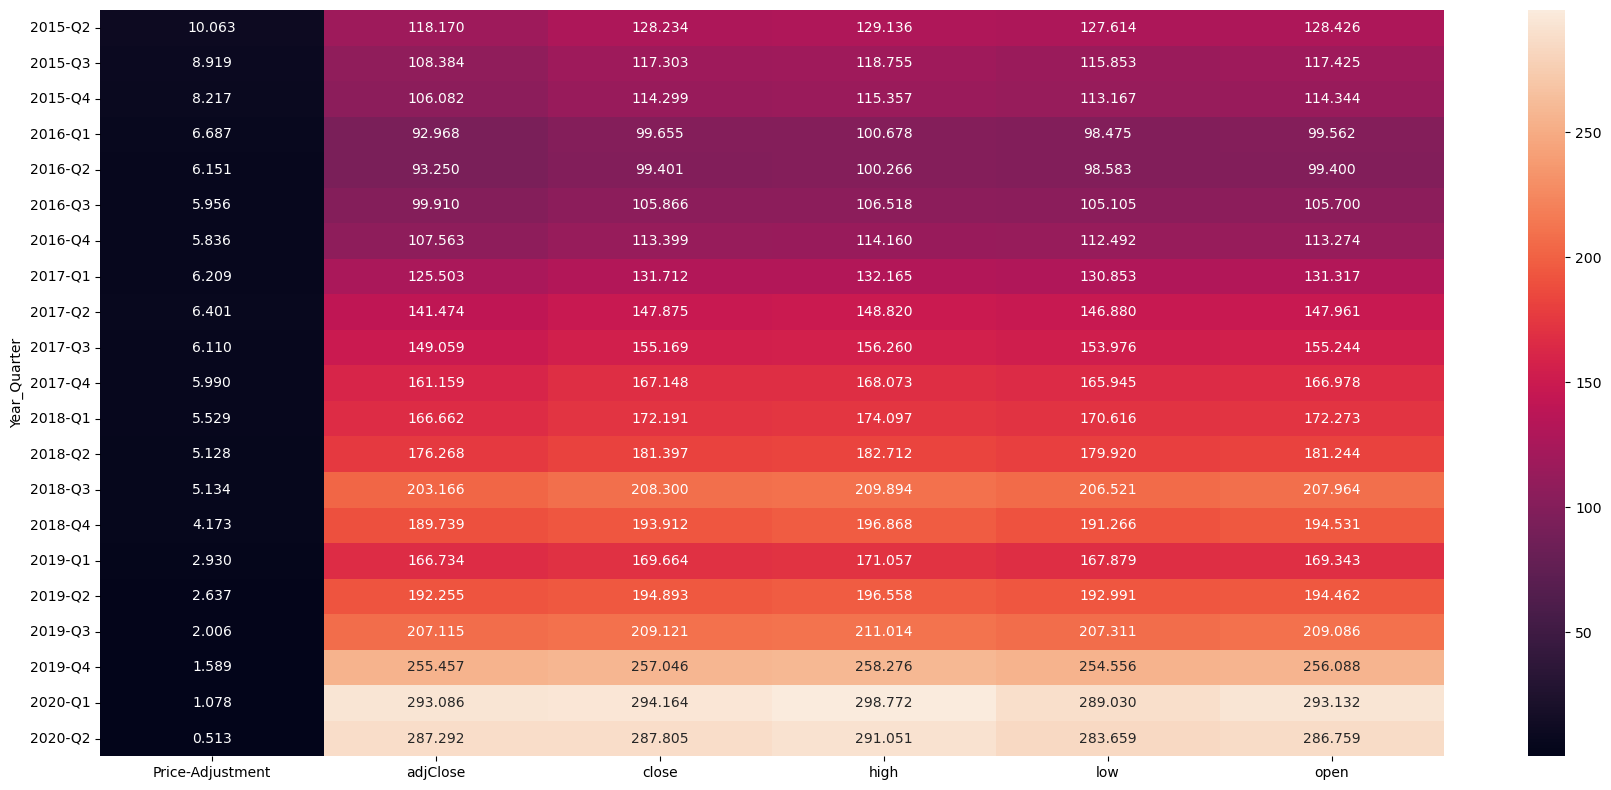

In [94]:
plt.figure(figsize=(18,8))
sns.heatmap(piv,annot=True,fmt='0.3f')
plt.tight_layout()

## Check Trends

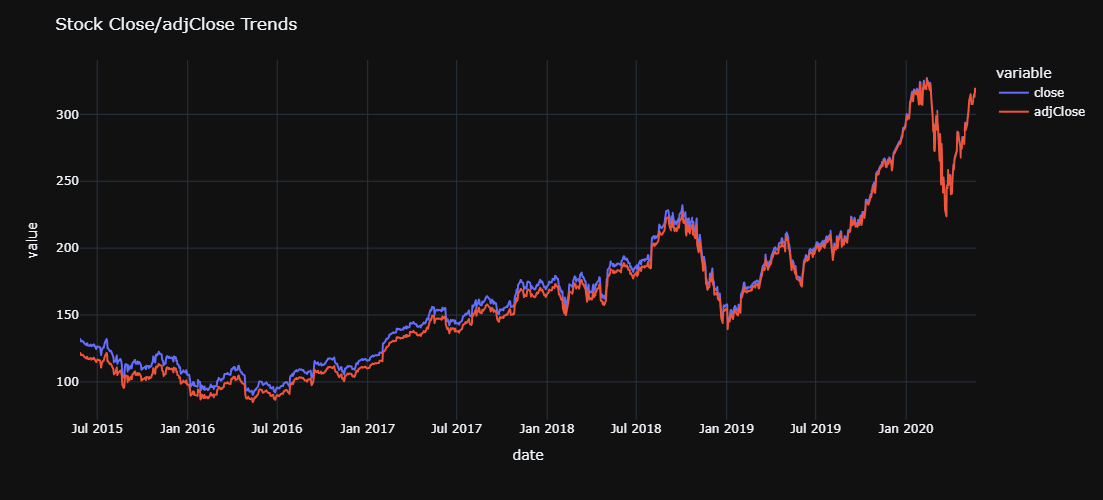

In [95]:
fig=ex.line(df,y=['close','adjClose'],height=500,width=1100)
fig.update_layout(
    template='plotly_dark',
    title_text="Stock Close/adjClose Trends ")


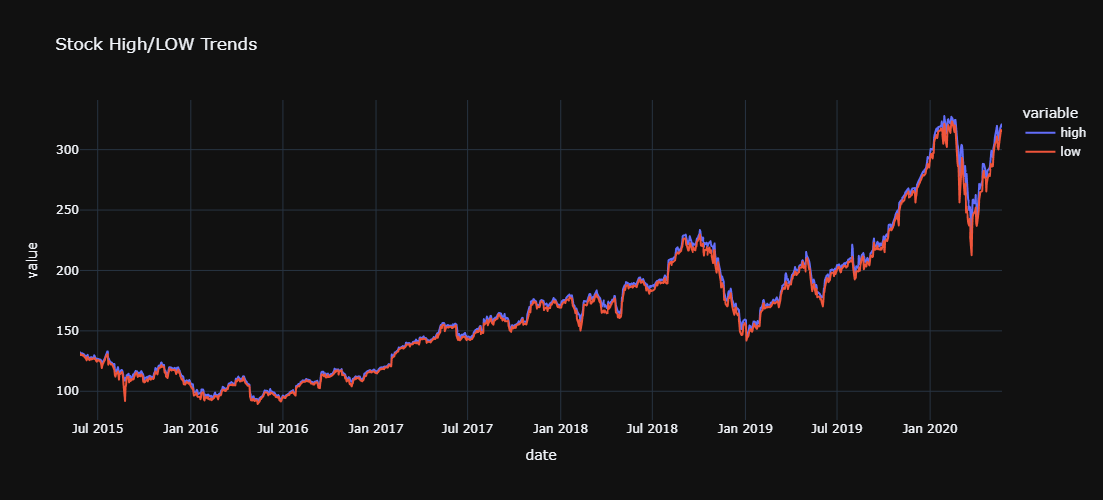

In [96]:
fig=ex.line(df,  y=['high','low'], title='Stock Low / High Price in Trends', height=500, width=1100)
fig.update_layout(
    template='plotly_dark',
    title_text="Stock High/LOW Trends ")


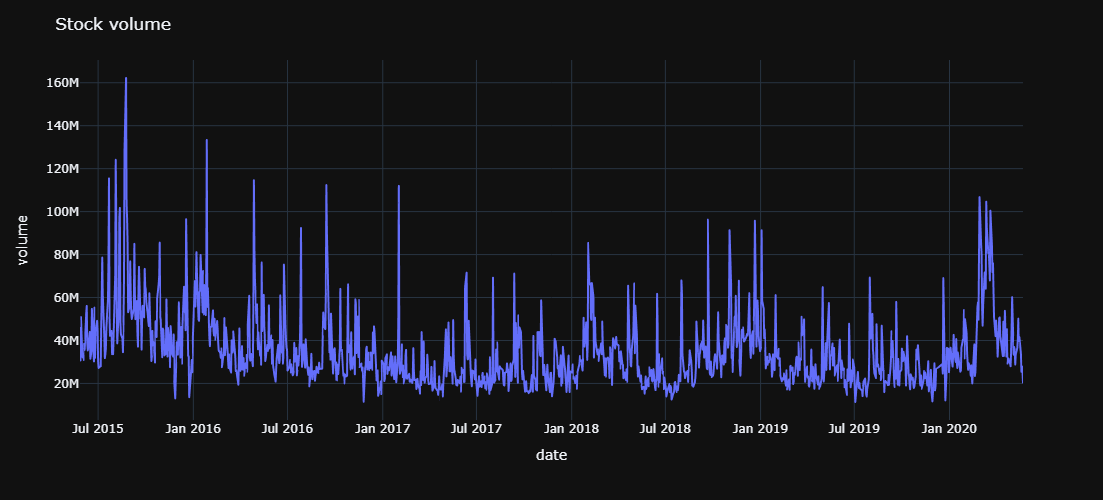

In [97]:
fig = ex.line(df, y='volume', height=500, width=1100)

fig.update_layout(
    template='plotly_dark',
    title_text="Stock volume ",  


)

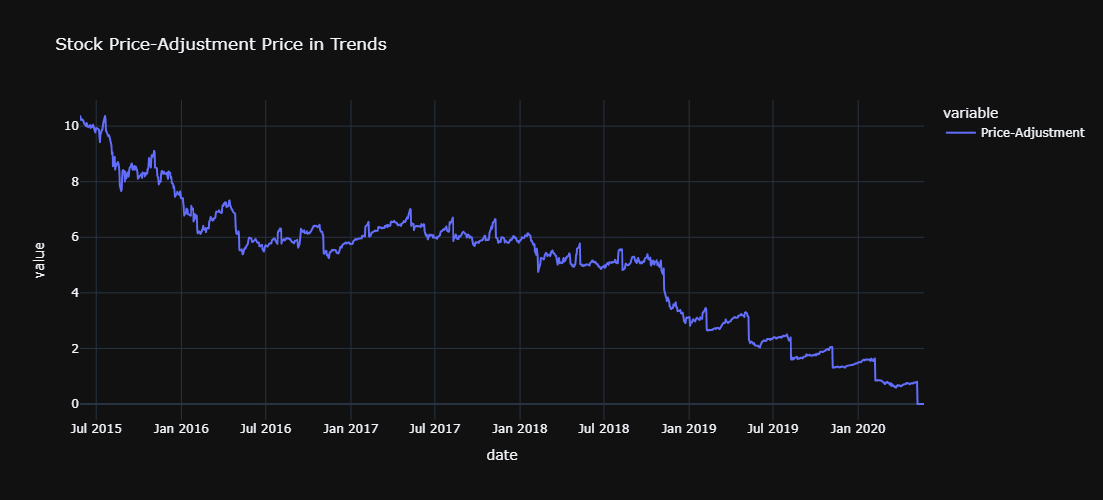

In [98]:
fig=ex.line(df, y=['Price-Adjustment'], title='Stock Price-Adjustment Price in Trends', height=500, width=1100)
fig.update_layout(
template='plotly_dark'
)

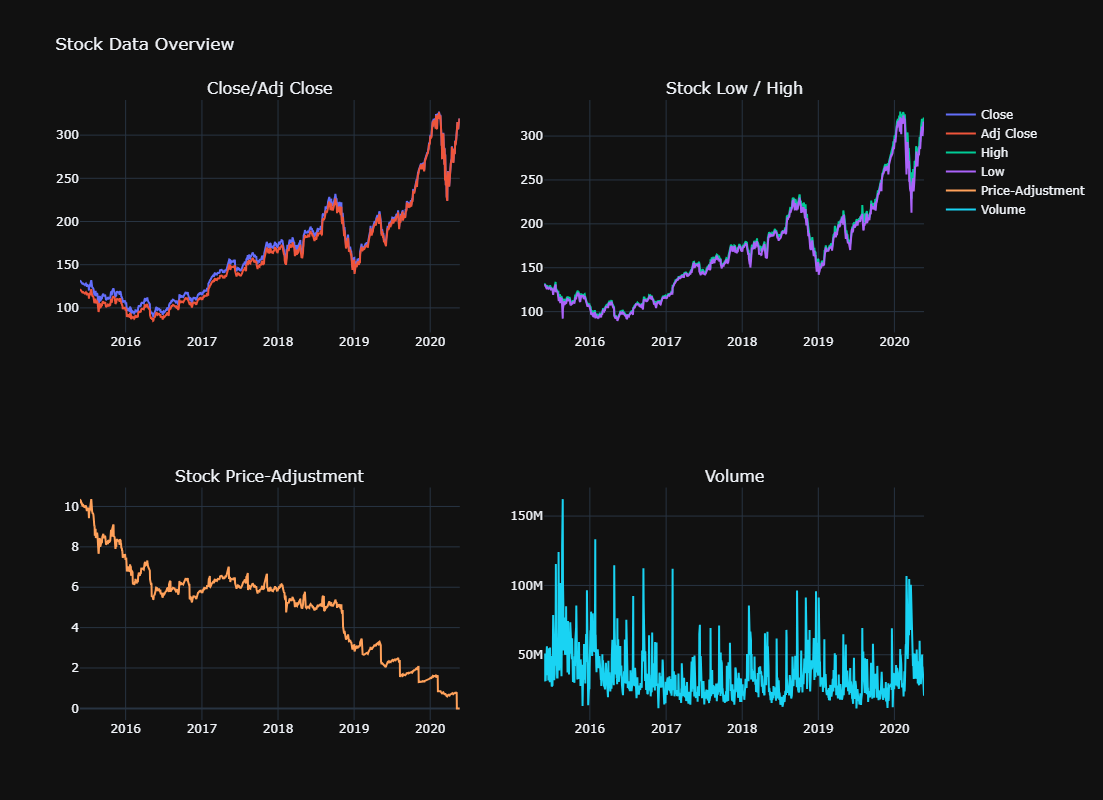

<Figure size 640x480 with 0 Axes>

In [99]:

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Close/Adj Close', 'Stock Low / High', 'Stock Price-Adjustment', 'Volume'],
)

fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['adjClose'], mode='lines', name='Adj Close'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['high'], mode='lines', name='High'), row=1, col=2)
fig.add_trace(go.Scatter(x=df.index, y=df['low'], mode='lines', name='Low'), row=1, col=2)

fig.add_trace(go.Scatter(x=df.index, y=df['Price-Adjustment'], mode='lines', name='Price-Adjustment'), row=2, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['volume'], mode='lines', name='Volume'), row=2, col=2)

fig.update_layout(
    height=800,  
    width=1100,   
    title_text="Stock Data Overview",  
    showlegend=True,  
    template='plotly_dark'  
)

fig.show()
plt.tight_layout()

In [100]:
df[(df.index=='2018-10-03')][['Year_Quarter','Day-name']] #232.07$

Year_Quarter     Day-name
date                                               
2018-10-03 00:00:00+00:00      2018-Q4  3-Wednesday

# Stock Price Performance Analysis (2015 - 2020)

## **2015**  
- **Highest (Q3):** Strong iPhone 6 and 6 Plus demand drove growth in the mid-year.  
- **Lowest (Q2):** Slower performance due to a demand dip before momentum picked up.  

---

## **2016**  
- **Highest (Q4):** Pre-launch excitement for the iPhone 7 led to increased sales.  
- **Lowest (Q1):** Post-launch adjustments and saturation caused demand to decline.  

---

## **2017**  
- **Highest (Q4):** Launch of the iPhone X with **Face ID** and **OLED displays** generated strong demand.  
- **Lowest (Q1):** Post-launch sales slowdown as customers anticipated the major redesign.  

---

## **2018**  
- **Highest (Q3):** Strong performance driven by the launch of **iPhone XS, XS Max, and XR**.  
- **Lowest (Q1):** Economic challenges and weak demand, particularly in China, affected sales.  

---

## **2019**  
- **Highest (Q4):** Exceptional performance from the **iPhone 11 series** due to its competitive pricing and improved features.  
- **Lowest (Q1):** Decline after the holiday season as consumers awaited new product updates.  

---

## **2020**  
- **Lowest (Q2):** COVID-19 pandemic caused disruptions in production and global sales.  

---

## **Summary Table**

| **Year**   | **Highest Quarter** | **Reason**                                               | **Lowest Quarter** | **Reason**                                   |
|------------|--------------------|---------------------------------------------------------|-------------------|---------------------------------------------|
| **2015**   | Q3                 | Strong iPhone 6 demand mid-year.                        | Q2                | Pre-growth demand slowdown.                 |
| **2016**   | Q3                 | Pre-launch excitement for iPhone 7.                    | Q4                | Post-launch market adjustment.              |
| **2017**   | Q4                 | iPhone X launch with innovative features.              | Q1                | Consumers held back for the new redesign.   |
| **2018**   | Q3                 | Strong iPhone XS, XS Max, and XR sales.                | Q4                | Weak global demand, especially in China.    |
| **2019**   | Q4                 | iPhone 11 series with competitive pricing.             | Q1                | Post-holiday demand reduction.              |
| **2020**   | Q4                 | iPhone 12 launch and 5G excitement.                    | Q2                | COVID-19 disrupted sales and production.    |


**Key Factors Driving Quarterly Variations**:
**Product Launches**:
- Apple’s business heavily depends on the success of its product launches, particularly iPhones. Quarters aligned with major launches (e.g., Q3 or Q4) consistently exhibit higher revenues.
- **Economic Factors**:
- External economic conditions like the U.S.-China trade war (2018-2019) and COVID-19 pandemic (2020) had significant impacts on consumer spending and production capacity.
- **Seasonality**:
Q1 typically benefits from strong holiday sales.
Quarters leading up to major launches, such as Q2 or Q3, often see softer performance as customers hold off on purchases.
- **Market Demand**:
Increased competition in global markets, particularly in China, affected sales during lower-performing quarters.


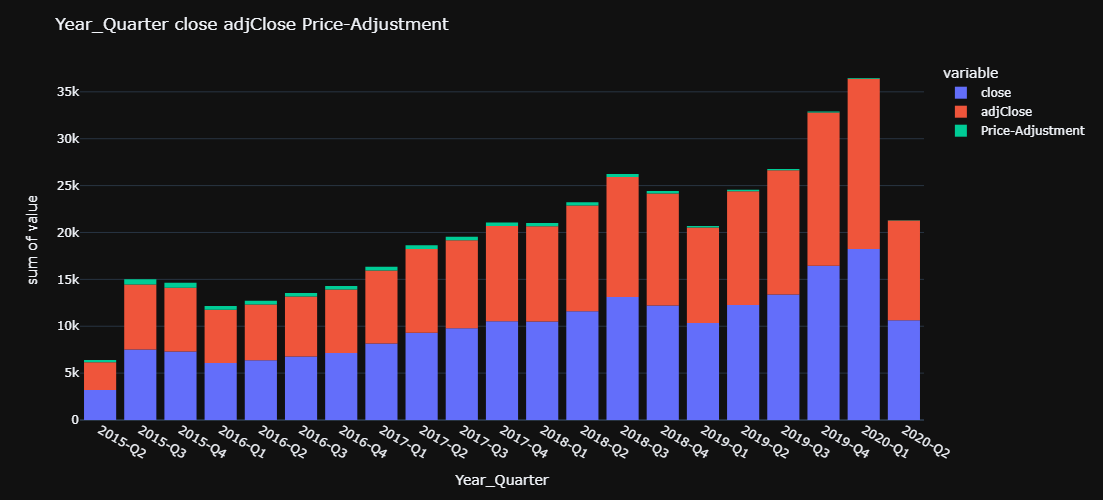

In [101]:
fig = ex.histogram(df,x='Year_Quarter', y=['close','adjClose','Price-Adjustment'], height=500, width=1100)

fig.update_layout(
    template='plotly_dark',
    title_text="Year_Quarter close adjClose Price-Adjustment")

# Let's Take turning point Filtered: Oct 2018 - Jan 2019

### 1. *3/Oct/2018 - $232.07 (High)*
   *Reason: Strong Performance in the Market, Anticipation of New Products*
   - *Q3 2018 Earnings Report*: In October 2018, Apple reported its fiscal Q3 earnings, which showed impressive revenue growth driven by higher-than-expected iPhone sales, strong performance from wearables, and a surge in services like the App Store and iCloud.
   - *Product Launches and Innovation*: Apple had recently launched the iPhone XS, XS Max, and XR models in September 2018, which were well-received by the market. The anticipation of new products and innovations like Apple's evolving ecosystem often generates investor optimism.
   - *Market Sentiment*: At the time, Apple was viewed as a stable, high-performing tech stock, and investors were willing to pay a premium for its - shares, pushing up the stock price.



### 2. *3/Jan/2019 - $142.19 (Low)*

   - *China’s Economic Slowdown*: Economic slowdown in China, which is a major market for Apple, and the ongoing trade tensions between the U.S. and China likely affected Apple's sales and investor sentiment. The drop in stock price reflects a loss of confidence in Apple's growth prospects.
   - *General Market Volatility*: The broader market was experiencing increased volatility during this period, partly due to concerns about the global economy, trade wars, and uncertainty over interest rates, all of which contributed to a broad sell-off in tech stocks

In [102]:
filtered_df = df[(df.index >= '2018-10-03') & (df.index <= '2019-01-03')]


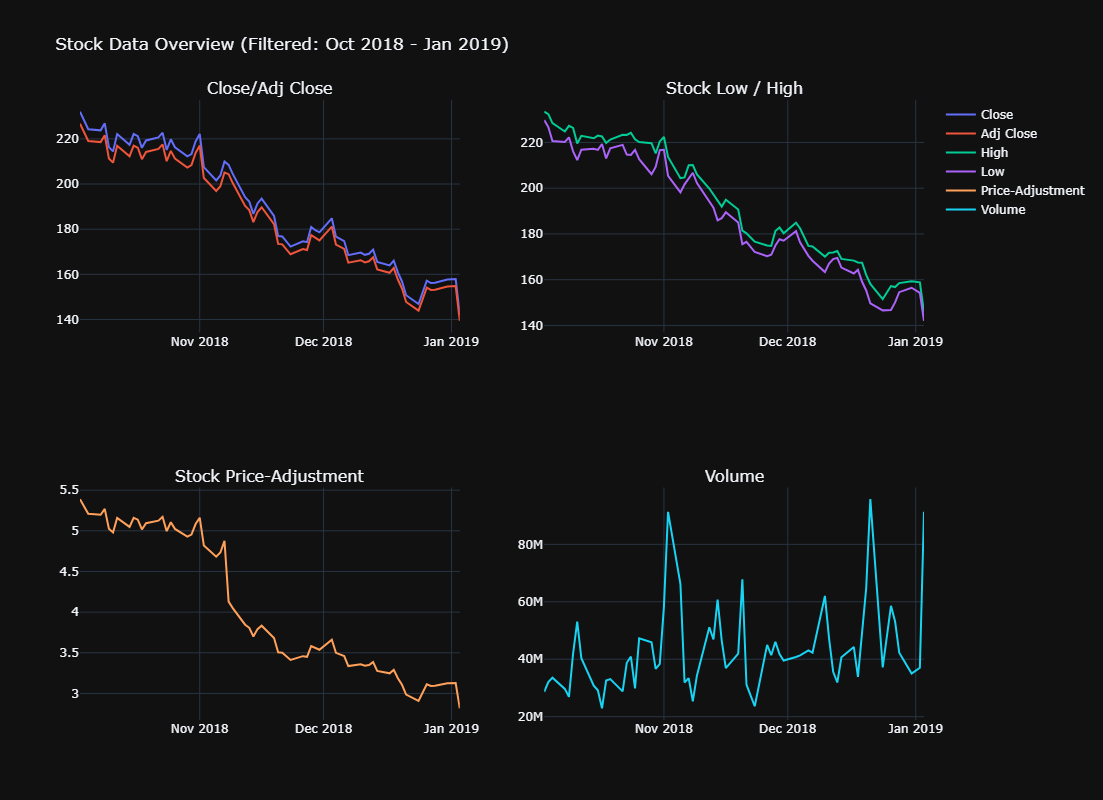

<Figure size 640x480 with 0 Axes>

In [103]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Close/Adj Close', 'Stock Low / High', 'Stock Price-Adjustment', 'Volume'],
)

fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['close'], mode='lines', name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['adjClose'], mode='lines', name='Adj Close'), row=1, col=1)

fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['high'], mode='lines', name='High'), row=1, col=2)
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['low'], mode='lines', name='Low'), row=1, col=2)

fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['Price-Adjustment'], mode='lines', name='Price-Adjustment'), row=2, col=1)

# Adding Volume trace
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['volume'], mode='lines', name='Volume'), row=2, col=2)

fig.update_layout(
    height=800,
    width=1100,
    title_text="Stock Data Overview (Filtered: Oct 2018 - Jan 2019)",
    showlegend=True,
    template='plotly_dark'
)

fig.show()
plt.tight_layout()

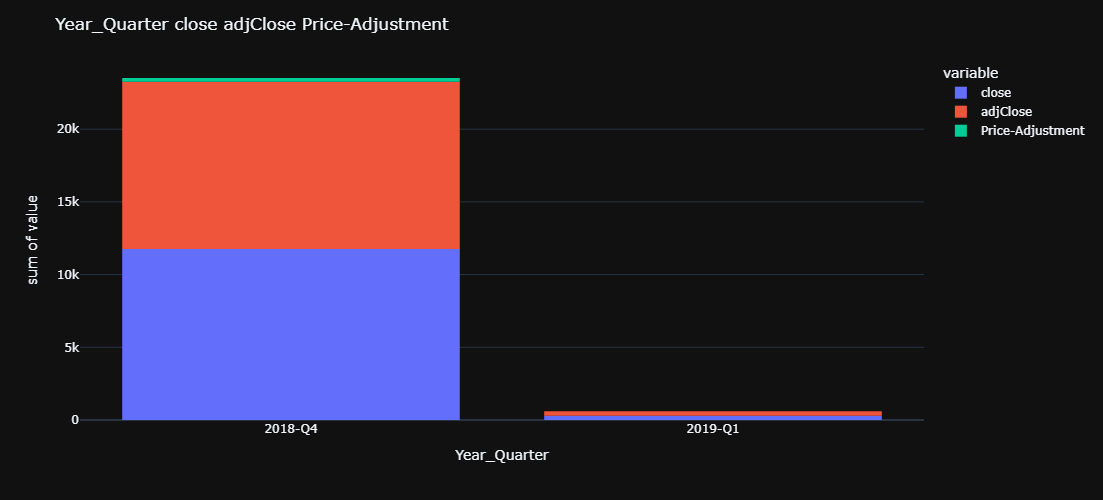

In [104]:
fig = ex.histogram(filtered_df,x='Year_Quarter', y=['close','adjClose','Price-Adjustment'], height=500, width=1100)

fig.update_layout(
    template='plotly_dark',
    title_text="Year_Quarter close adjClose Price-Adjustment")

### 3. *12/Feb/2020 - $327.2 (High)*
   *Reason: Strong Performance, Services Growth, and Market Optimism*
   - *Strong Financial Results*: By February 2020, Apple was riding high on solid Q1 2020 earnings. The company reported significant growth in services revenue (App Store, iCloud, Apple Music) and wearables (AirPods, Apple Watch), which helped offset slowing iPhone sales.
   - *Market Sentiment*: Apple’s stock was benefiting from strong investor confidence, not only in its hardware but also in its growing services business, which provided more consistent, recurring revenue streams. The stock was also benefiting from broader optimism in the stock market.
   - *Innovation and Product Development*: The launch of products like the Apple Watch and AirPods were gaining traction in the market. In addition, Apple was continuing to focus on increasing its services revenue, which helped diversify its income streams beyond just hardwares.s.


## 4. *23/Mar/2020 - $224.37 (Low)*: 
   - COVID-19 pandemic caused global market panic.
   - Supply chain disruptions and uncertainty about future sales.

In short, highs were driven by strong financials and optimism, while lows were due to external factors like economic concerns and the pandemic.

In [105]:
filtered_df = df[(df.index >= '2020-02-12') & (df.index <= '2020-03-23')]


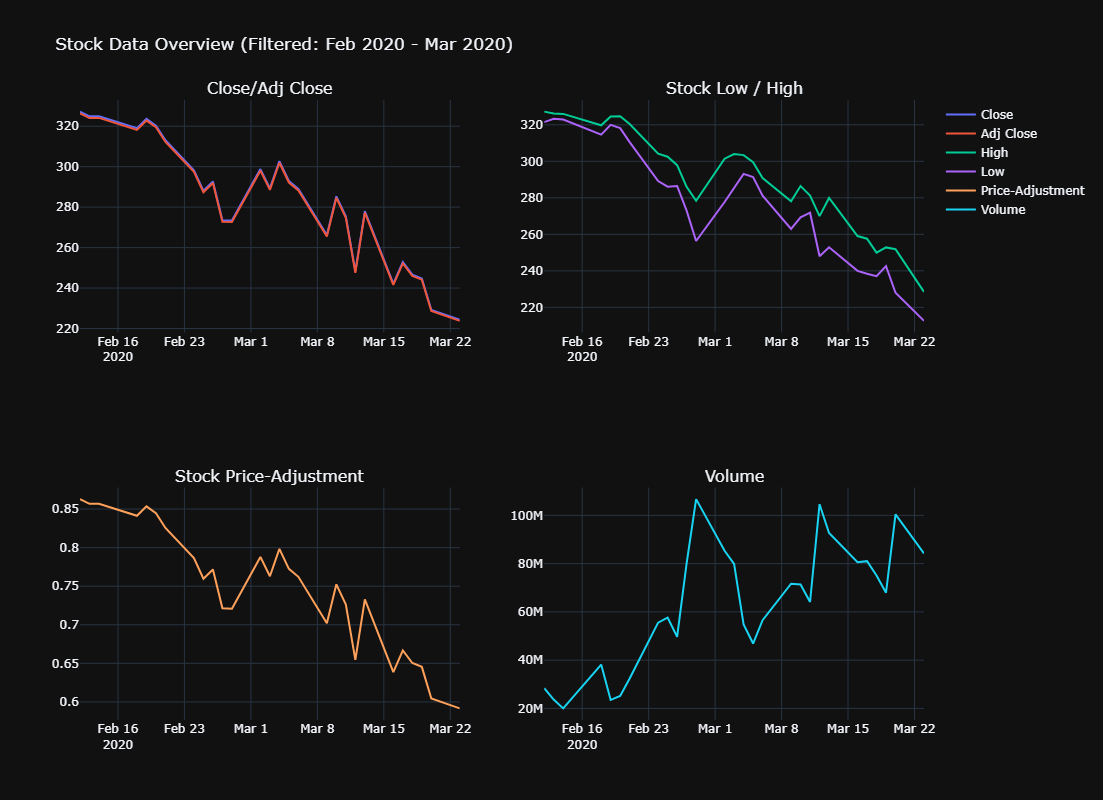

In [106]:

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Close/Adj Close', 'Stock Low / High', 'Stock Price-Adjustment', 'Volume'],
)

# Adding Close and Adj Close traces
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['close'], mode='lines', name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['adjClose'], mode='lines', name='Adj Close'), row=1, col=1)

# Adding High and Low traces
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['high'], mode='lines', name='High'), row=1, col=2)
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['low'], mode='lines', name='Low'), row=1, col=2)

# Adding Price Adjustment trace
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['Price-Adjustment'], mode='lines', name='Price-Adjustment'), row=2, col=1)

# Adding Volume trace
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['volume'], mode='lines', name='Volume'), row=2, col=2)

# Updating layout
fig.update_layout(
    height=800,
    width=1100,
    title_text="Stock Data Overview (Filtered: Feb 2020 - Mar 2020)",
    showlegend=True,
    template='plotly_dark'
)

# Displaying the plot
fig.show()


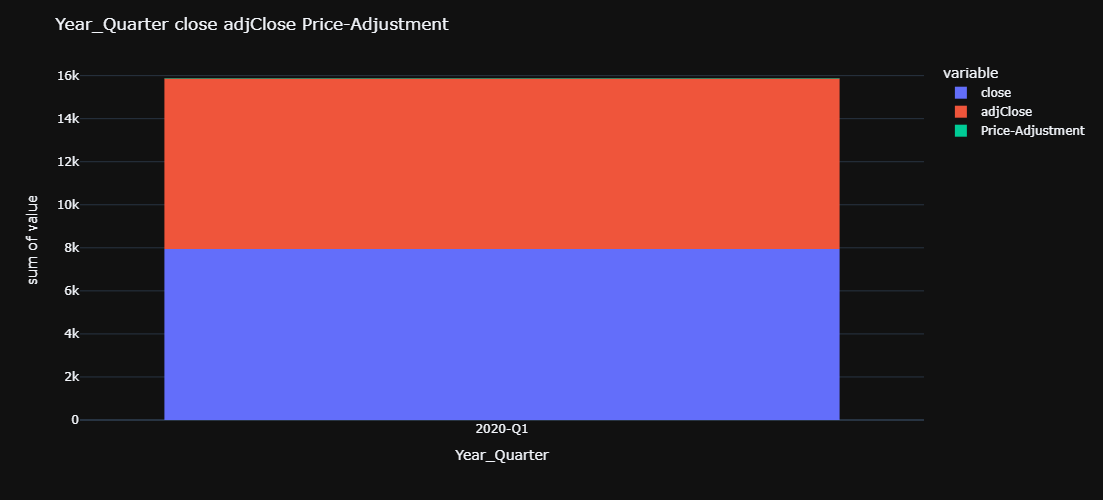

In [107]:
fig = ex.histogram(filtered_df,x='Year_Quarter', y=['close','adjClose','Price-Adjustment'], height=500, width=1100)

fig.update_layout(
    template='plotly_dark',
    title_text="Year_Quarter close adjClose Price-Adjustment")

In [108]:
df_q=df.resample('W-MON', kind = 'period').sum(numeric_only=True)
df_q

C:\Users\mostafa\AppData\Local\Temp\ipykernel_5904\1033609247.py:1: FutureWarning:

The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead



Year    close      high        low      open  \
date                                                                   
2015-05-26/2015-06-01   8060   524.64   527.050   521.1000   524.630   
2015-06-02/2015-06-08  10075   645.89   651.075   643.3200   648.500   
2015-06-09/2015-06-15  10075   638.98   643.170   634.7650   638.085   
2015-06-16/2015-06-22  10075   636.99   639.920   633.8100   637.180   
2015-06-23/2015-06-29  10075   633.92   641.070   632.4892   636.680   
...                      ...      ...       ...        ...       ...   
2020-04-21/2020-04-27  10100  1385.64  1404.450  1369.4500  1384.760   
2020-04-28/2020-05-04  10100  1442.34  1462.720  1422.6072  1435.190   
2020-05-05/2020-05-11  10100  1527.07  1536.810  1506.8300  1512.480   
2020-05-12/2020-05-18  10100  1551.27  1569.828  1526.1841  1548.010   
2020-05-19/2020-05-25   8080  1268.11  1278.160  1260.4300  1266.140   

                          volume     adjClose  Price-Adjustment  splitFactor  
date                                                                          
2015-05-26/2015-06-01  159563804   483.468037         41.171963          4.0  
2015-06-02/2015-06-08  191402873   595.202750         50.687250          5.0  
2015-06-09/2015-06-15  211428749   588.835023         50.144977          5.0  
2015-06-16/2015-06-22  188575654   587.001191         49.988809          5.0  
2015-06-23/2015-06-29  210716086   584.172115         49.747885          5.0  
...                          ...          ...               ...          ...  
2020-04-21/2020-04-27  166614893  1381.985957          3.654043          5.0  
2020-04-28/2020-05-04  201633520  1438.536434          3.803566          5.0  
2020-05-05/2020-05-11  171323543  1524.691538          2.378462          5.0  
2020-05-12/2020-05-18  205893390  1551.270000          0.000000          5.0  
2020-05-19/2020-05-25   99431565  1268.110000          0.000000          4.0  

[261 rows x 9 columns]

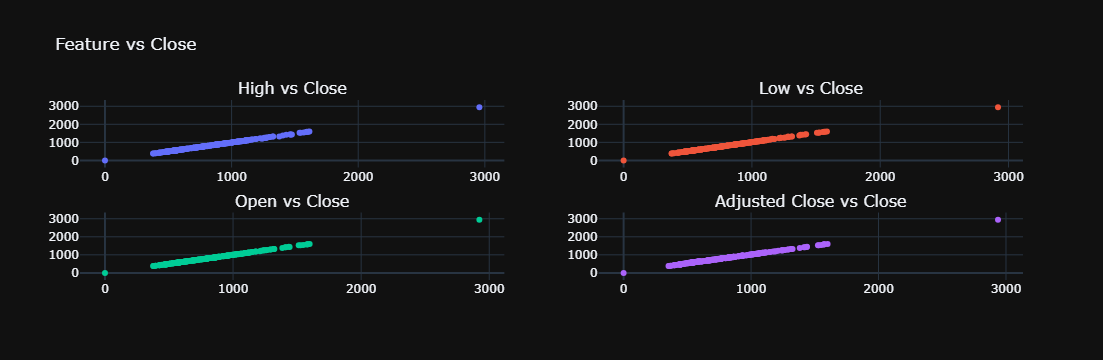

In [109]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("High vs Close", "Low vs Close", "Open vs Close", "Adjusted Close vs Close"))

fig.add_trace(go.Scatter(x=df_q['high'], y=df_q['close'], mode='markers', name='High vs Close'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_q['low'], y=df_q['close'], mode='markers', name='Low vs Close'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_q['open'], y=df_q['close'], mode='markers', name='adjClose vs open'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_q['adjClose'], y=df_q['close'], mode='markers', name='Adjusted Close vs Close'),
              row=2, col=2)

fig.update_layout(title_text="Feature vs Close", showlegend=False,template='plotly_dark',)

fig.show()


## Normalization

In [110]:
scaler = MinMaxScaler()
numeric_columns = df_q.select_dtypes(include=['float64', 'int64']).columns
df_q_scaled = df_q.copy()
df_q_scaled[numeric_columns] = scaler.fit_transform(df_q[numeric_columns])

In [111]:
df_q_scaled=df_q_scaled.drop(columns=['splitFactor','Year'])

In [112]:
df_q_scaled

close      high       low      open    volume  \
date                                                                      
2015-05-26/2015-06-01  0.177696  0.178254  0.178575  0.179483  0.361142   
2015-06-02/2015-06-08  0.218764  0.220201  0.220459  0.221860  0.433204   
2015-06-09/2015-06-15  0.216424  0.217527  0.217527  0.218297  0.478529   
2015-06-16/2015-06-22  0.215750  0.216428  0.217200  0.217988  0.426805   
2015-06-23/2015-06-29  0.214710  0.216817  0.216747  0.217817  0.476916   
...                         ...       ...       ...       ...       ...   
2020-04-21/2020-04-27  0.469319  0.475001  0.469295  0.473745  0.377101   
2020-04-28/2020-05-04  0.488523  0.494709  0.487511  0.490997  0.456359   
2020-05-05/2020-05-11  0.517221  0.519767  0.516374  0.517439  0.387758   
2020-05-12/2020-05-18  0.525418  0.530934  0.523006  0.529594  0.466001   
2020-05-19/2020-05-25  0.429511  0.432288  0.431935  0.433163  0.225045   

                       adjClose  Price-Adjustment  
date                                               
2015-05-26/2015-06-01  0.164579          0.812275  
2015-06-02/2015-06-08  0.202616          1.000000  
2015-06-09/2015-06-15  0.200448          0.989302  
2015-06-16/2015-06-22  0.199824          0.986221  
2015-06-23/2015-06-29  0.198861          0.981467  
...                         ...               ...  
2020-04-21/2020-04-27  0.470448          0.072090  
2020-04-28/2020-05-04  0.489698          0.075040  
2020-05-05/2020-05-11  0.519027          0.046924  
2020-05-12/2020-05-18  0.528075          0.000000  
2020-05-19/2020-05-25  0.431683          0.000000  

[261 rows x 7 columns]

In [113]:
df_q_scaled.corr()['close']

close               1.000000
high                0.999839
low                 0.999872
open                0.999895
volume             -0.009306
adjClose            0.999598
Price-Adjustment   -0.629566
Name: close, dtype: float64

## Feature Engineering

## **Aggregation and Transformation of Highly Correlated Features**

In [114]:
# Create average price and price range
df_q_scaled['avg_price'] = (df_q_scaled['high'] + df_q_scaled['low'] + df_q_scaled['open']) / 3
df_q_scaled['price_range'] = df_q_scaled['high'] - df_q_scaled['low']
df_q_scaled['open_close_diff'] = df_q_scaled['open'] - df_q_scaled['close']
df_q_scaled = df_q_scaled.drop(['high', 'low', 'open', 'adjClose'], axis=1) 


In [115]:
corr_sc=pd.DataFrame(df_q_scaled.corr()['close'])
corr_sc

close
close             1.000000
volume           -0.009306
Price-Adjustment -0.629566
avg_price         0.999955
price_range       0.357102
open_close_diff   0.303500

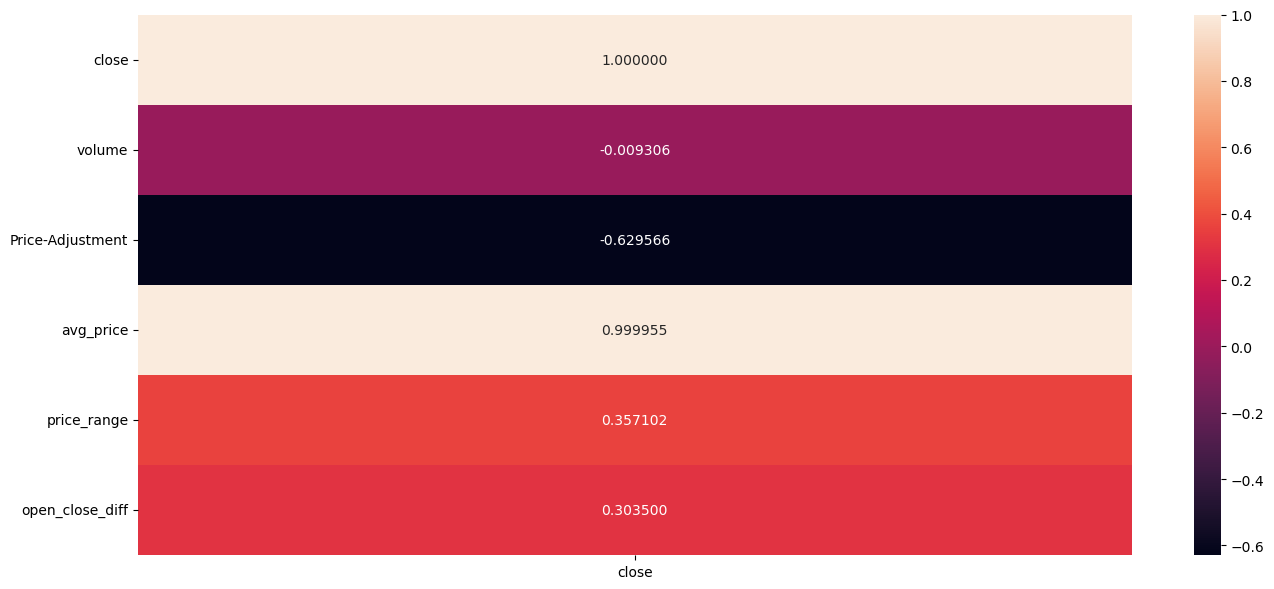

In [116]:
plt.figure(figsize=(14,6))
sns.heatmap(corr_sc,fmt='0.6f',annot=True)
plt.tight_layout()



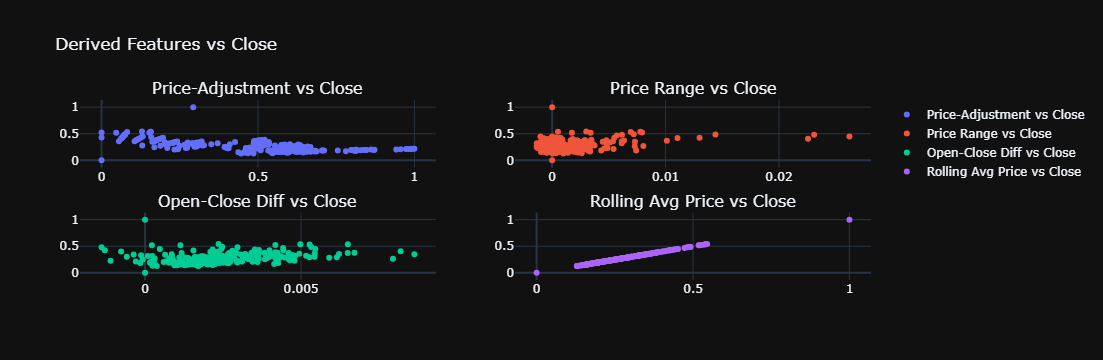

In [117]:
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    "Price-Adjustment vs Close", 
    "Price Range vs Close", 
    "Open-Close Diff vs Close", 
    "Rolling Avg Price vs Close"
))

# Add scatter plots for each feature vs target (close)
fig.add_trace(go.Scatter(x=df_q_scaled['Price-Adjustment'], y=df_q_scaled['close'], mode='markers', name='Price-Adjustment vs Close'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_q_scaled['price_range'], y=df_q_scaled['close'], mode='markers', name='Price Range vs Close'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_q_scaled['open_close_diff'], y=df_q_scaled['close'], mode='markers', name='Open-Close Diff vs Close'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_q_scaled['avg_price'], y=df_q_scaled['close'], mode='markers', name='Rolling Avg Price vs Close'),
              row=2, col=2)

fig.update_layout(
    title_text="Derived Features vs Close", 
    showlegend=True,
    template='plotly_dark'
)

# Display the plot
fig.show()


## **Prepare the Dataset For Split**

In [118]:
df_q_scaled['datetime'] = df_q_scaled.index

X = df_q_scaled.drop(columns=['close', 'Price-Adjustment', 'volume', 'datetime'])
y = df_q_scaled['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.74, random_state=42)

X_train['datetime'] = df_q_scaled.loc[X_train.index, 'datetime']
X_test['datetime'] = df_q_scaled.loc[X_test.index, 'datetime']

X_train.set_index('datetime', inplace=True)
X_test.set_index('datetime', inplace=True)


## **Train the Random Forest Regressor**

In [119]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## **Make Predictions**

In [120]:
# Predict on the Test Set
y_pred = rf_model.predict(X_test)


## **Actual vs Predicted**

In [121]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
comparison_df.index = X_test.index

comparison_df


Actual  Predicted
datetime                                  
2015-12-22/2015-12-28  0.145875   0.150585
2018-02-20/2018-02-26  0.294633   0.287902
2018-08-28/2018-09-03  0.303253   0.295900
2016-10-18/2016-10-24  0.198445   0.198118
2018-06-12/2018-06-18  0.322227   0.318730
...                         ...        ...
2016-01-19/2016-01-25  0.166170   0.161135
2019-07-23/2019-07-29  0.352910   0.353028
2015-07-14/2015-07-20  0.217660   0.216938
2018-09-04/2018-09-10  0.378655   0.378098
2019-08-27/2019-09-02  0.280255   0.277562

[194 rows x 2 columns]

## **Evaluate the Model**

In [122]:
# Calculate Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R-squared (R2): {r2:.6f}")


Mean Squared Error (MSE): 0.000289
Mean Absolute Error (MAE): 0.007067
R-squared (R2): 0.967557


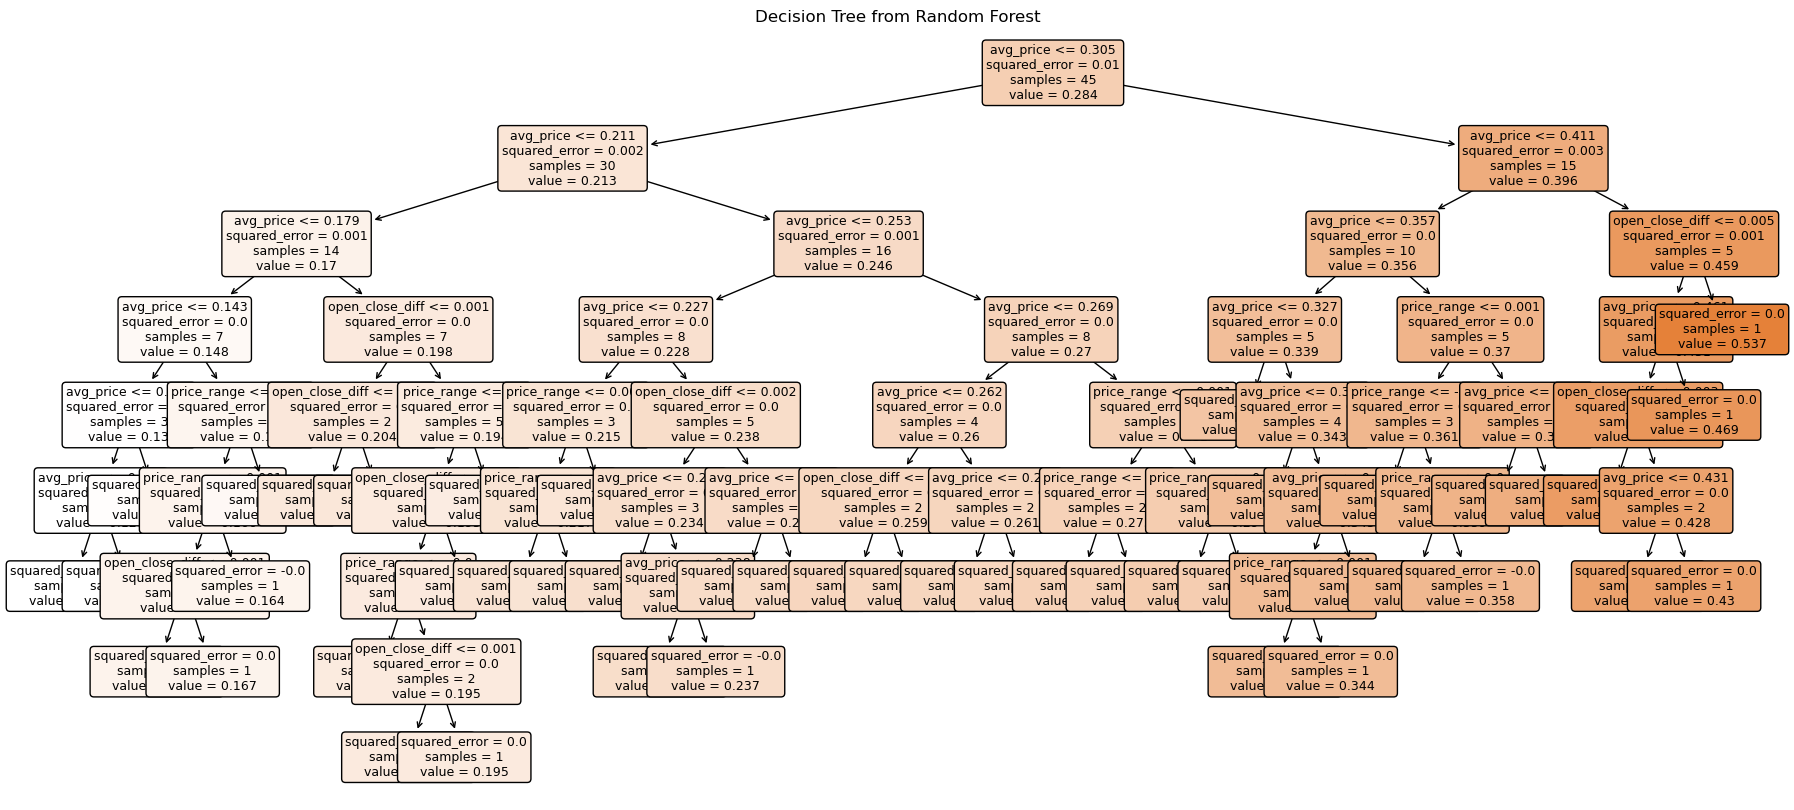

In [123]:
# Visualize the first tree (index 0) in the Random Forest
plt.figure(figsize=(22, 10))  # Adjust figure size if needed
plot_tree(rf_model.estimators_[99],
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          fontsize=9)  # Adjust fontsize if needed
plt.title("Decision Tree from Random Forest")
plt.show()

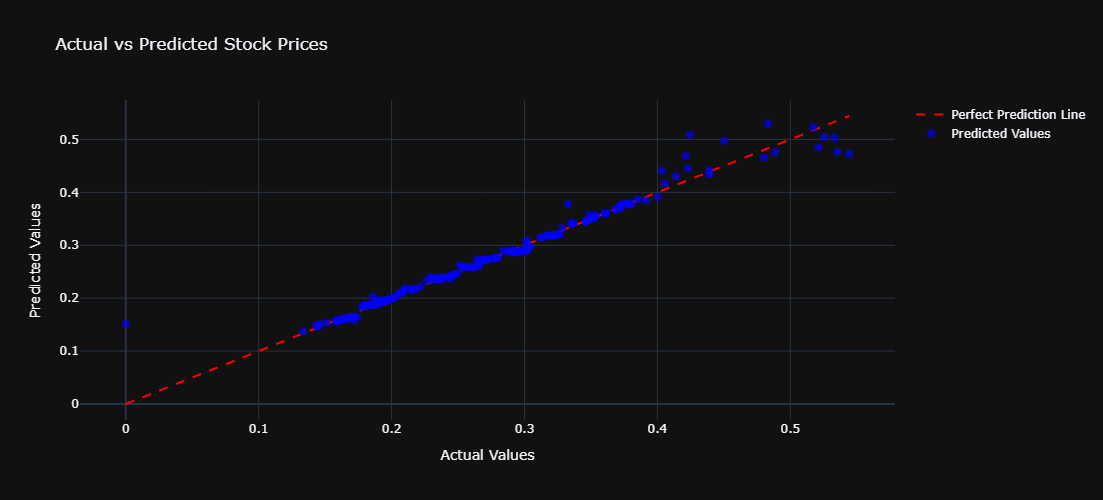

<Figure size 640x480 with 0 Axes>

In [124]:
fig = go.Figure()

# Add perfect prediction line
fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    name='Perfect Prediction Line',
    line=dict(color='red', dash='dash', width=2)
))

# Add predicted values as scatter points
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Predicted Values',
    marker=dict(color='blue', size=8, opacity=0.7)
))

# Update layout
fig.update_layout(
    title='Actual vs Predicted Stock Prices',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    template='plotly_dark',  # Dark theme
    width=1100,              # Adjusted width
    height=500               # Adjusted height
)

# Show the plot
fig.show()
plt.tight_layout()

## ----------------------------------------*A7la 3la A7la*-------------------------------------------------

## -----------------------------------------------*Thank's*-------------------------------------------------